In [89]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [90]:
# Univers

Bright = ctrl.Antecedent(np.arange(0, 30, 1), 'Brightness') # lx
L_inten = ctrl.Consequent(np.arange(0, 30, 1), 'Light intensity') # cd

In [91]:
Bright['low'] = fuzz.trimf(Bright.universe, [0, 0, 12])
Bright['medium'] = fuzz.trimf(Bright.universe, [8, 15, 22])
Bright['high'] = fuzz.trimf(Bright.universe, [18, 30, 30])

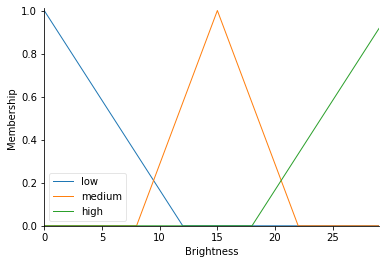

In [92]:
Bright.view()

In [93]:
L_inten['off'] = fuzz.trapmf(L_inten.universe,[0,0,5,12])
L_inten['half_on'] = fuzz.trapmf(L_inten.universe,[8,12,18,22])
L_inten['full_on'] = fuzz.trapmf(L_inten.universe,[18,25,30,30])

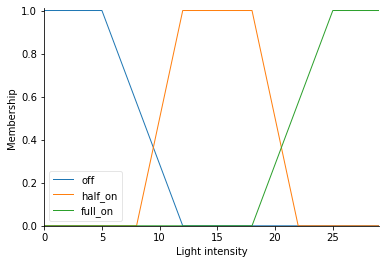

In [94]:
L_inten.view()

In [95]:
rule1 = ctrl.Rule(Bright['low'],L_inten['full_on'])
rule2 = ctrl.Rule(Bright['medium'],L_inten['half_on'])
rule3 = ctrl.Rule(Bright['high'],L_inten['off'])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

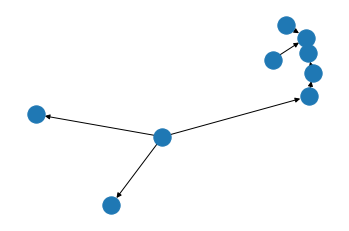

In [96]:
rule1.view()

In [97]:
light_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
lighting = ctrl.ControlSystemSimulation(light_ctrl)

In [98]:
lighting.input['Brightness'] = 15

In [99]:
lighting.compute()

14.999999999999996


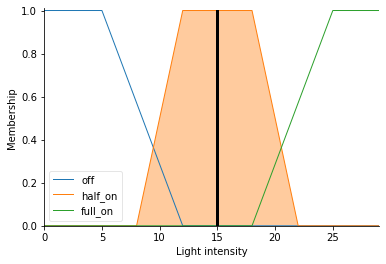

In [100]:
print(lighting.output['Light intensity'])
L_inten.view(sim=lighting)

In [ ]:
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')

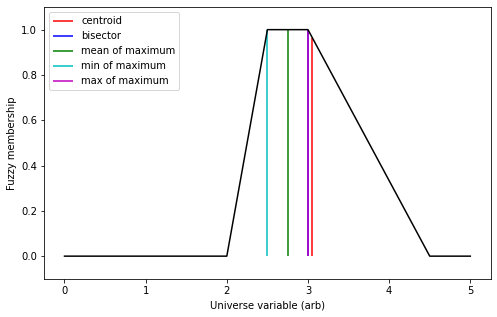

In [101]:
# Generate trapezoidal membership function on range [0, 1]
x = np.arange(0, 5.05, 0.1)
mfx = fuzz.trapmf(x, [2, 2.5, 3, 4.5])

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()